**Purpose**: Analyze the training event of Galaxy Hub

In [1]:
import base64
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import yaml

from dateutil import relativedelta

In [2]:
url = "https://docs.google.com/spreadsheets/d/1WXNXDp6YnEbXJ-QCdpgU9SC3P6KyRwKcwnKz-gDPtJg/export?format=csv&gid=655592015"

In [3]:
df = (pd.read_csv(url)
      .fillna('')
      .rename(columns = {'Date': 'date', 'Country': 'country', 'Continent': 'continent'})
      .assign(
        date=lambda x: pd.to_datetime(x['date']),
        month=lambda x: x['date'].dt.to_period('M'),
        year=lambda x: x['date'].dt.to_period('Y'))
      .replace(to_replace='Online', value='Global'))
df = df[df.year < pd.Period(value='2022')]
df

,date,country,continent,month,year
0,2018-01-08,Norway,Europe,2018-01,2018
1,2018-01-12,United States,North America,2018-01,2018
2,2018-01-13,United States,North America,2018-01,2018
3,2018-01-18,Australia,Australia,2018-01,2018
4,2018-01-22,Australia,Australia,2018-01,2018
...,...,...,...,...,...
280,2021-11-24,Australia,Australia,2021-11,2021
281,2021-11-29,France,Europe,2021-11,2021
282,2021-11-29,United Kingdom,Europe,2021-11,2021
283,2021-11-29,Global,Global,2021-11,2021


In [4]:
new_df = pd.DataFrame(
    0,
    columns=[x for x in df.continent.drop_duplicates().sort_values() if x !='Global'] + ['Global', 'Total'],
    index=['Total'] + list(df.year.drop_duplicates().sort_values(ascending=False)))
grouped_df = df.groupby(['year', 'continent'])
for g in grouped_df.groups:
    (y, c) = g
    new_df[c][y] = len(grouped_df.get_group(g))
new_df.loc['Total'] = new_df.sum(axis=0)
new_df['Total'] = new_df.sum(axis=1)
new_df

,Africa,Asia,Australia,Europe,North America,South America,Global,Total
Total,6,21,71,134,42,2,9,285
2021,0,4,15,30,3,0,5,57
2020,1,5,14,27,12,0,2,61
2019,1,7,22,40,13,2,1,86
2018,4,5,20,37,14,0,1,81


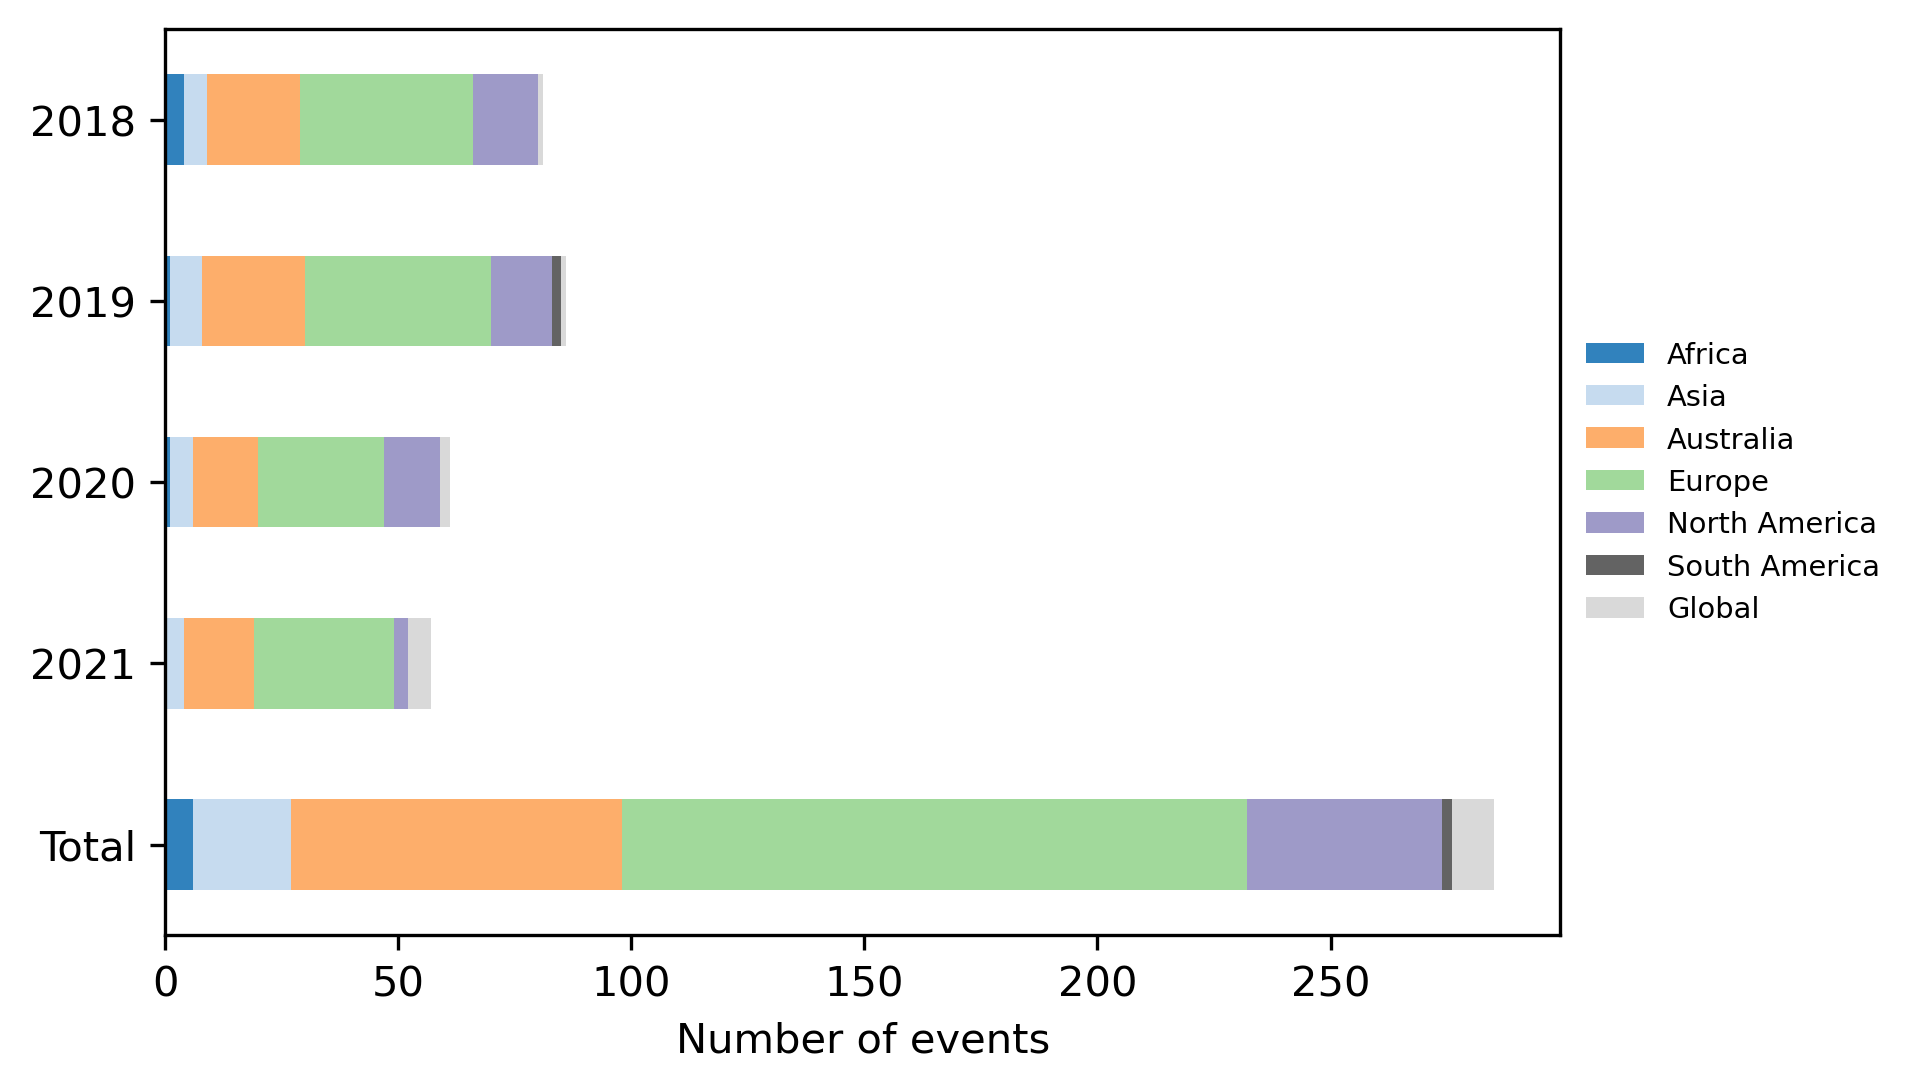

In [5]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(new_df
     .drop(['Total'], axis=1)
     .plot.barh(stacked=True, ax=ax, colormap='tab20c'))
plt.xlabel('Number of events')
ax.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=False,
    fontsize='x-small')
plt.savefig('../images/hub-training-per-year.png', bbox_inches='tight')

In [6]:
(new_df
     .div(new_df.Total, axis='index')
     .mul(100, axis='index')
     .drop(['Total'])
     .drop(['Total'], axis=1))

,Africa,Asia,Australia,Europe,North America,South America,Global
2021,0.000000,7.017544,26.315789,52.631579,5.263158,0.000000,8.771930
2020,1.639344,8.196721,22.950820,44.262295,19.672131,0.000000,3.278689
2019,1.162791,8.139535,25.581395,46.511628,15.116279,2.325581,1.162791
2018,4.938272,6.172840,24.691358,45.679012,17.283951,0.000000,1.234568


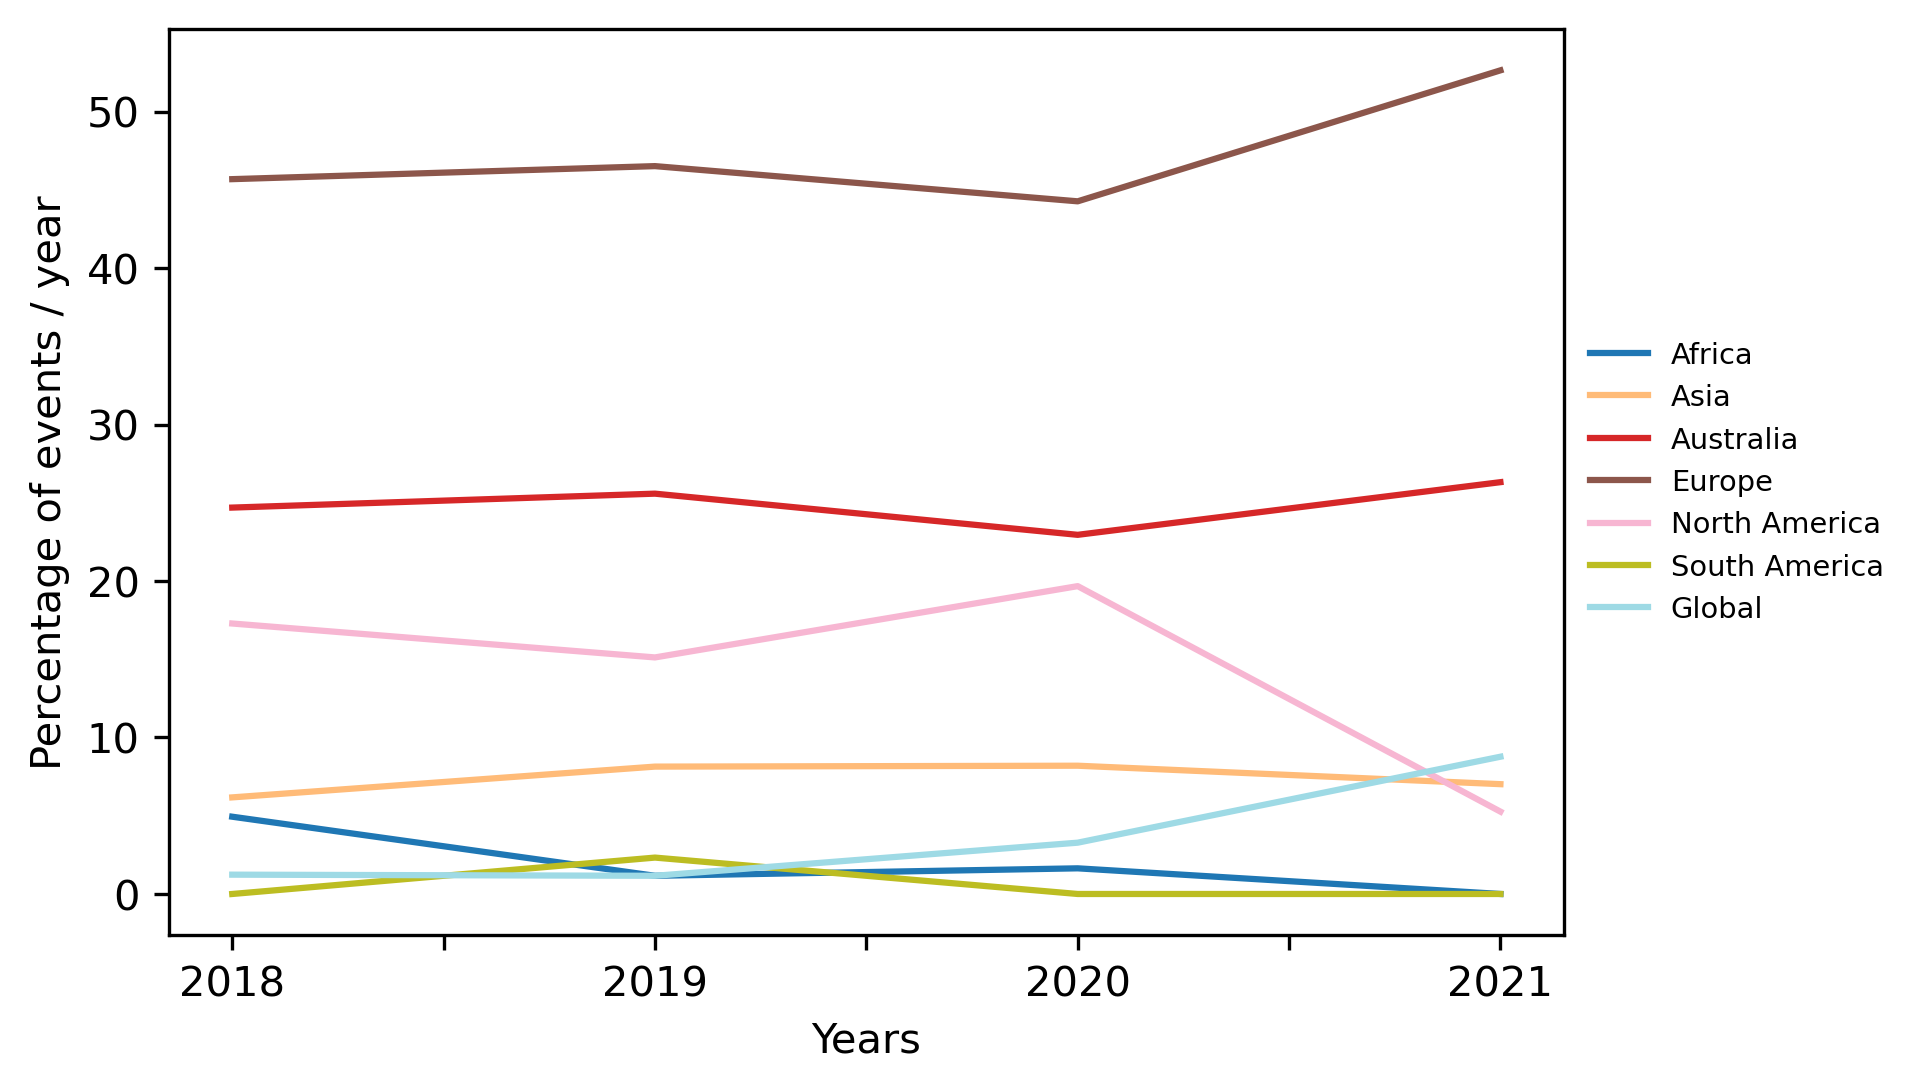

In [7]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(new_df
     .div(new_df.Total, axis='index')
     .mul(100, axis='index')
     .drop(['Total'])
     .drop(['Total'], axis=1)
     .sort_index()
     .plot(ax=ax, colormap='tab20'))
plt.xlabel('Years')
plt.ylabel('Percentage of events / year')
ax.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=False,
    fontsize='x-small')
plt.savefig('../images/hub-training-over-years.png', bbox_inches='tight')